## Приоритизация гипотез и анализ результатов А/В-теста

**Совместно с отделом маркетинга подготовлен список гипотез для увеличения выручки. Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.**

**Описание данных**   

*Данные для первой части:*  
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.   

*Данные для второй части:*
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

План работ по первой части проекта:
- применить фреймворк ICE для приоритизации гипотез. Выбрать приоритетные.
- примените фреймворк RICE для приоритизации гипотез. Отсортировать по приоритету.
- выбрать приоритетные гипотезы в результате применения обоих методик.

План работ по второй части проекта:
- проанализировать A/B-тест:
- построить график кумулятивной выручки по группам;
- построить график кумулятивного среднего чека по группам;
- построить график относительного изменения кумулятивного среднего чека группы B к группе A;
- построить график кумулятивного среднего количества заказов на посетителя по группам;
- построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A;
- построить точечный график количества заказов по пользователям;
- посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выберать границу для определения аномальных пользователей;
- построить точечный график стоимостей заказов;
- посчитать 95-й и 99-й перцентили стоимости заказов. Выберать границу для определения аномальных заказов;
- построить статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным;
- посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным;
- посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным;
- посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным;
- принять решение по результатам теста.

### Предобработка данных

Импортируем необходимые библиотеки и читаем данные, подобрав соответствующий разделитель.

In [1]:
import pandas as pd
pd.options.display.max_colwidth = 130
pd.set_option("expand_frame_repr", False)

In [2]:
data = pd.read_csv('/datasets/hypothesis.csv', sep=',')

In [3]:
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Выведем общую информацию для проверки пропусков, типов данных и оценки размеров датасета.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Приведем названия столбцов к стандартному виду

In [5]:
data.columns = data.columns.str.lower()
data.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

В данных нет пропусков, типы данных соответствуют содержимому, дубликатов нет - это видно при выводе самого массива. Для последующей работы с данными изменены названия столбцов.

### Приоритизация гипотез

Применим фреймворк ICE (impact, confidence, effort / ease «влияние, уверенность, усилия / простота») ) для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [6]:
data['ICE'] = (data['impact']*data['confidence'])/data['efforts']
ice = data.loc[:, ['hypothesis','ICE']].sort_values(by='ICE',  ascending=False)
display(ice.round(2))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Наиболее перспективные гипотезы по ICE: 
- 8 Запустить акцию, дающую скидку на товар в день рождения;
- 0 Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
- 7 Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
- 6 Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.

Применим фреймворк RICE для приоритизации гипотез, который, кроме параметров методики ICE, учитывает также охват пользователей. Параметр reach — скольких пользователей затронет изменение, которое вы хотите внести. Отсортируем их по убыванию приоритета.

In [7]:
data['RICE'] = (data['reach']*data['impact']*data['confidence'])/data['efforts']
rice = data.loc[:, ['hypothesis','RICE']].sort_values(by='RICE',  ascending=False)
display(rice)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее перспективные гипотезы по RICE:
- 7 Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
- 2 Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа; 
- 0 Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей; 
- 6  Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.

Приоритеты изменились, т.к. учитываем параметр охвата пользователей, которых затронет изменение - reach. У 7 гипотезы ("Добавить форму подписки на все основные страницы") этот параметр наибольший, что вывело ее на 1 место. Новая форма подписки затронет всех пользователей интернет-магазина. 8 гипотеза (скидка на товар в день рождения) теперь только на 5 месте, т.к. запущенная акция похоже мало кого затронет в один момент (оценка reach равна 1), хотя в нужных изменениях для именинников, мы сильно уверены. У 2 гипотезы ("Добавить блоки рекомендаций товаров на сайт интернет магазина") тоже довольно высока оценка охвата пользователей, многие прочитают рекомендации. А у 0 гипотезы ("Добавить два новых канала привлечения трафика") - большая оценка влияния на пользователей и велика наша уверенность, что это влияние именно такое, как нам нужно. Поэтому она в тройке приоритетов по обеим методикам.   

Для дальнейшей работы, в первую очередь, следует рассмотреть гипотезы:
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (7); 
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (0);
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию (6).   

А также "Запустить акцию, дающую скидку на товар в день рождения" (8) и "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа" (2), если есть на это средства и невелики трудозатраты и материальные вложения.

### Анализ A/B-теста

Был проведен A/B-тест и получены результаты в соответствующих файлах. Проанализируем эти результаты.

#### Предобработка

Импортируем необходимые библиотеки и ознакомимся с полученными данными.

In [8]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import stats as st

In [9]:
orders = pd.read_csv('/datasets/orders.csv', sep=',')

In [10]:
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')

In [11]:
print(orders.head(5))
print(visitors.head(5))

   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     1650     B
1     2804400009  3642806036  2019-08-15      730     B
2     2961555356  4069496402  2019-08-15      400     A
3     3797467345  1196621759  2019-08-15     9759     B
4     2282983706  2322279887  2019-08-15     2308     B
         date group  visitors
0  2019-08-01     A       719
1  2019-08-02     A       619
2  2019-08-03     A       507
3  2019-08-04     A       717
4  2019-08-05     A       756


Получим информацию о пропусках и типах данных.

In [12]:
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Приведем даты к общепринятому типу данных.

In [13]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
orders.dtypes

transactionId             int64
visitorId                 int64
date             datetime64[ns]
revenue                   int64
group                    object
dtype: object

In [14]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
visitors.dtypes

date        datetime64[ns]
group               object
visitors             int64
dtype: object

Проверим наличие дубликатов:

In [15]:
visitors.duplicated().sum()

0

In [16]:
orders.duplicated().sum()

0

Получим статистику по данным массива.

In [17]:
orders.describe().round()

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1197.0
mean,2.155621e+09,2.165960e+09,8348.0
std,1.229085e+09,1.236014e+09,39191.0
min,1.062393e+06,5.114589e+06,50.0
25%,1.166776e+09,1.111826e+09,1220.0
50%,2.145194e+09,2.217985e+09,2978.0
75%,3.237740e+09,3.177606e+09,8290.0
max,4.293856e+09,4.283872e+09,1294500.0


Видим, что средняя выручка по заказу приближенно от 1 до 8 тысяч. При этом есть существенное отклонение и аномальный по отношению к основному массиву максимум.

In [18]:
visitors.describe().round()

,visitors
count,62.0
mean,607.0
std,114.0
min,361.0
25%,534.0
50%,624.0
75%,710.0
max,770.0


По количеству посетителей сайта данные достаточно "гладкие". От 534 до 710 посетителей в основной выборке. В среднем около 600. Максимум 770, минимум примерно в 2 раза меньше.

**Массивы обработаны, изменены типы данных - дат, не найдено полных дубликатов в строках. Получено первичное представление о содержимом массивов. Можно приступать к анализу данных теста.**

#### Построим график кумулятивной выручки по группам

In [19]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

In [20]:
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [21]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [22]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [23]:
print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


Сравним даты в исходных данных и в полученном массиве:

In [24]:
print(cumulativeData['date'].min())
print(cumulativeData['date'].max())

2019-08-01 00:00:00
2019-08-31 00:00:00


In [25]:
print(orders['date'].min())
print(orders['date'].max())

2019-08-01 00:00:00
2019-08-31 00:00:00


In [26]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

In [27]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

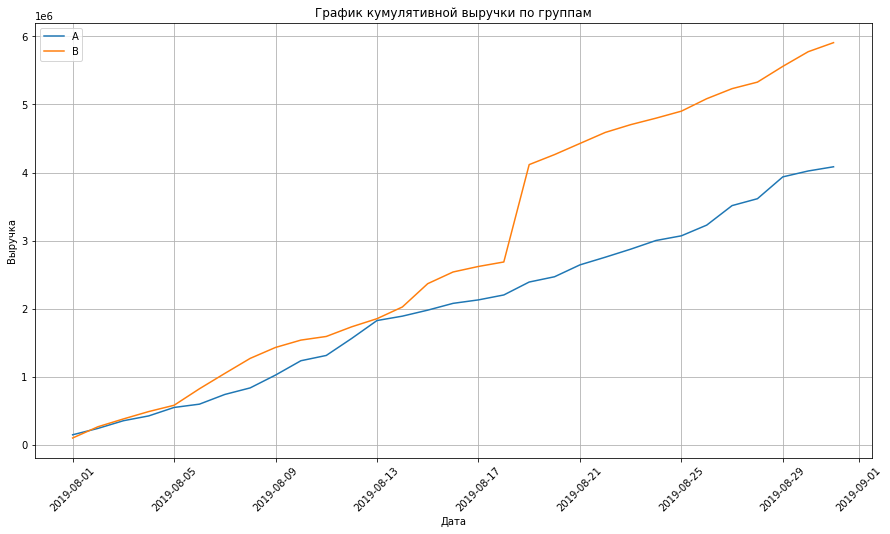

In [28]:
plt.figure(figsize=(15,8))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(rotation = 45)
plt.grid()
plt.tick_params(axis='x', labelsize=10)
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend()
plt.show()

До 18.08.2019 выручка увеличивалась практически равномерно в 2-ух группах. Группа В стабильно опережала группу А, несколько раз выручка практически сравнивалась. 18.08-19.08 произошел скачок выручки группы В, после чего опережение увеличилось и стабилизировалось, если судить по графику. Видимо, в этот день кто-то совершил особо крупную покупку или было сделано очень много заказов. Это нужно проверить.

#### Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

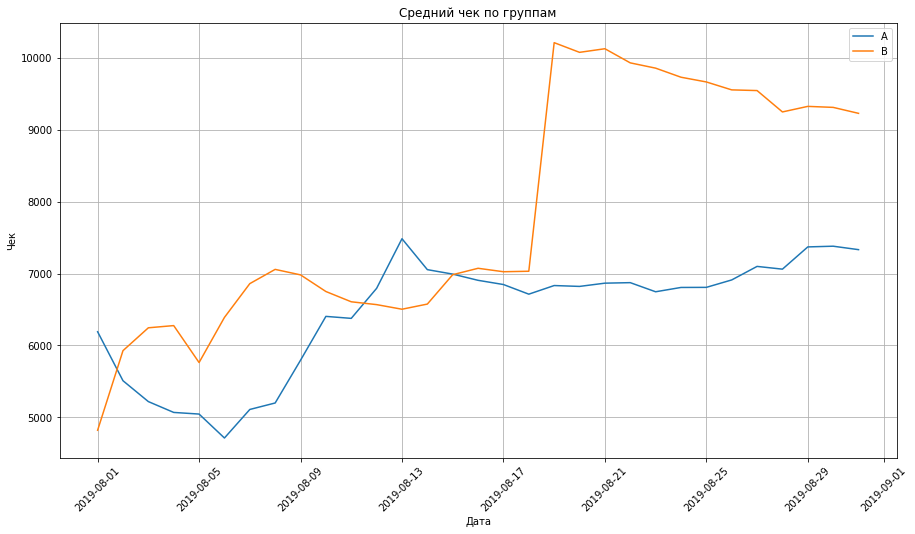

In [29]:
plt.figure(figsize=(15,8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation = 45)
plt.grid()
plt.tick_params(axis='x', labelsize=10)
plt.title('Средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Чек')
plt.legend()
plt.show()

Средний чек по группам довольно сильно колеблется. Скачок чека от 7 до примерно 10 тысяч 18.08 подтверждается, после чего начинается уменьшение суммы чека. Но пока рано делать выводы на основании этих данных. Требуется дополнительный анализ выбросов, которые могут искажать результаты.

#### Построим график относительного различия для среднего чека

In [30]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

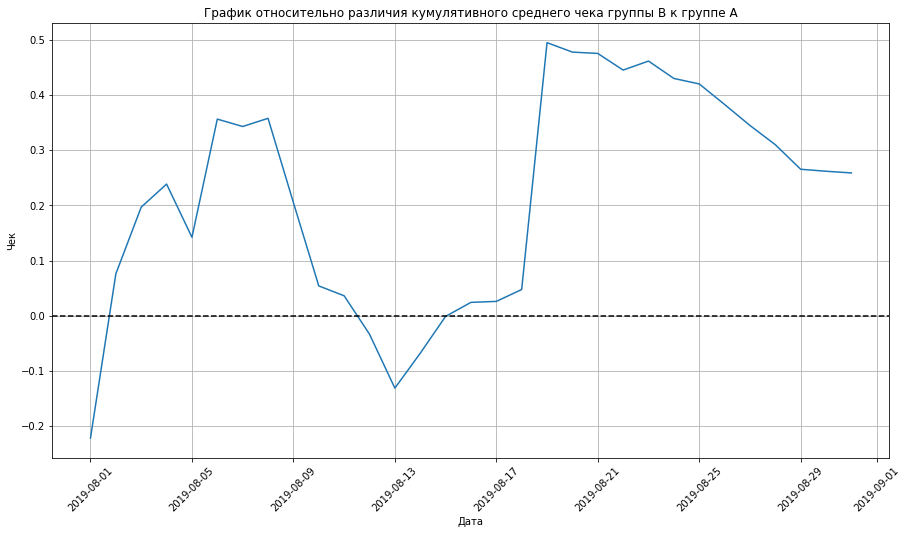

In [31]:
# cтроим отношение средних чеков
plt.figure(figsize=(15,8))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.xticks(rotation = 45)
plt.grid()
plt.tick_params(axis='x', labelsize=10)
plt.title('График относительно различия кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Чек')

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

Наблюдаются резкие скачки, которые могут указывать на крупные покупки и выбросы.

#### Проанализируем график кумулятивной конверсии

In [32]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

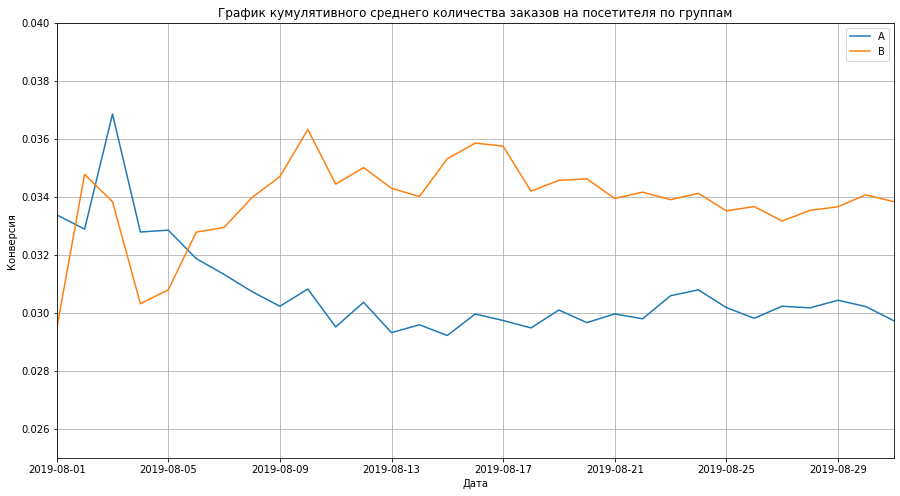

In [33]:
# строим графики
plt.figure(figsize=(15,8))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.grid()
plt.tick_params(axis='x', labelsize=10)
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0.025, 0.04])
plt.show()

В начале месяца конверсия сегмента А была выше сегмента В, потом они поменялись местами и устаноились примерно около одного значения, конверсия группы В выше конверсии группы А.

#### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

In [34]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

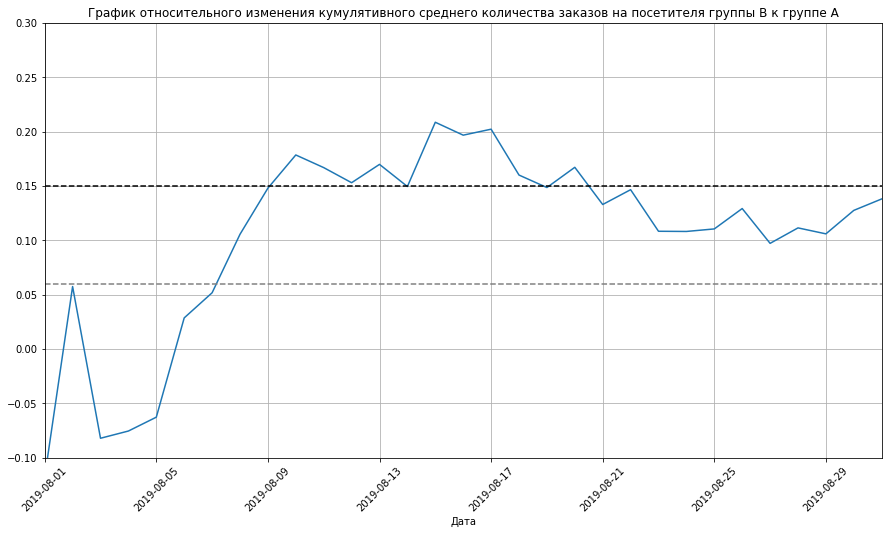

In [35]:
plt.figure(figsize=(15,8))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.xticks(rotation = 45)
plt.grid()
plt.tick_params(axis='x', labelsize=10)
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.axhline(y=0.06, color='grey', linestyle='--')
plt.axhline(y=0.15, color='black', linestyle='--')
# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), -0.1, 0.3])
plt.show()

В начале теста группа В сильно колебалась относительно группы А - то вырывалась вперед, то проигрывала. Но затем вырвалась вперед, ее конверсия увеличилась и стабилизировалась около 15% прироста относительно группы А.

#### Точечный график количества заказов по пользователям

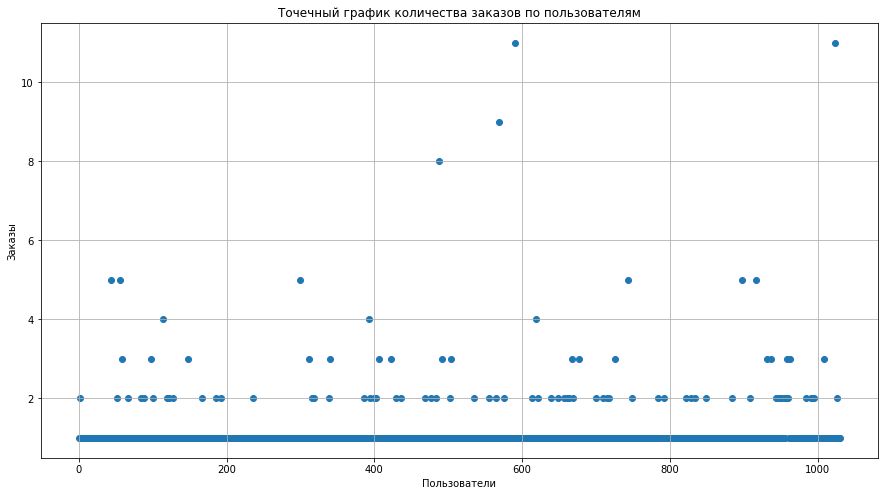

In [36]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(15,8))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Заказы')
plt.grid()
plt.show()

Пользователей, сделавших больше 2 заказов мало, а больше 4 - ничтожно мало. Чтобы понять, какое количество заказов отнести к аномальным значениям, нужно посчитать выборочные прецентили.

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей

In [37]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 
perc_order99 = np.percentile(ordersByUsers['orders'], [99])
perc_order = round(perc_order99[0])

[2. 4.]


In [38]:
perc_order

4

Не более 1% пользователей заказали больше 4 раз и не более 5% - более 2 раз(заказов). Можно провести границу на отметке больше 4-х заказов.

 #### Исследуем точечный график стоимостей заказов

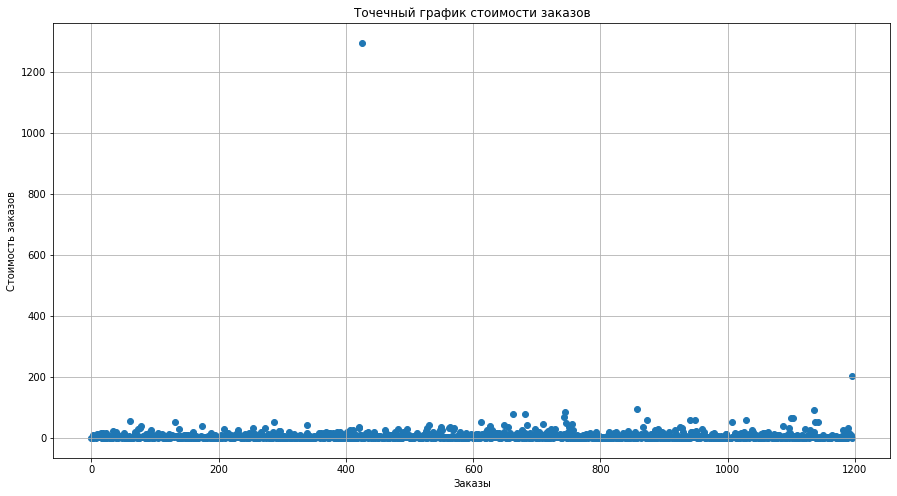

In [39]:
orders['revenue'] = orders['revenue']/1000
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,8))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимости заказов')
plt.xlabel('Заказы')
plt.ylabel('Стоимость заказов')
plt.grid()
plt.show()

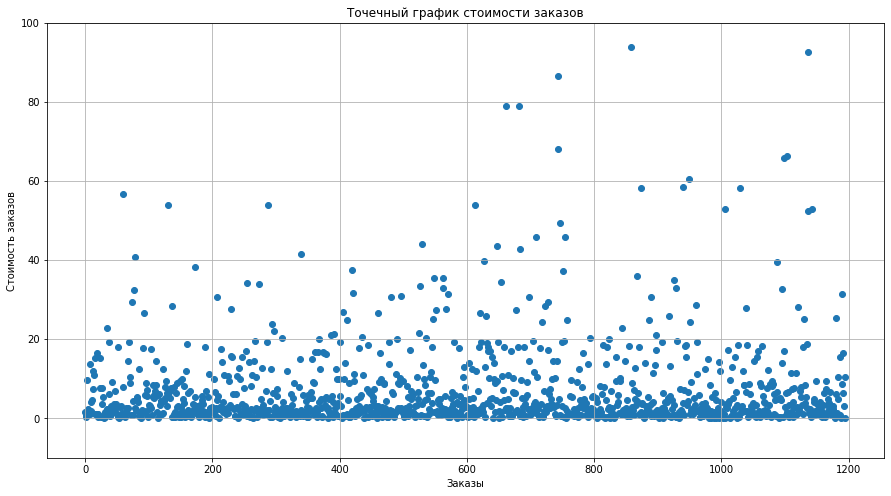

In [40]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,8))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимости заказов')
plt.xlabel('Заказы')
plt.ylabel('Стоимость заказов')
plt.ylim(-10, 100)
plt.grid()
plt.show()

По графику видно, что заказов дороже 100 тысяч практически нет. По укрупненному графику видим, что большая часть заказов находится в пределах стоимости до 60 тыс.руб.

Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [41]:
print(np.percentile(orders['revenue'], [95, 99]))
perc_rev99 = np.percentile(orders['revenue'], [99])
perc_rev = round(perc_order99[0])

[28.     58.2332]


Не более 5% заказов дороже 28 тысяч рублей и не более 1% - дороже 58 000 руб. В дальнейшем используем границы по 99-ому перцентилю. То есть 58 тыс.руб.

#### Статистическая значимость различий по "сырым" данным

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.
Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.

In [42]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [43]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print('p-value: '"{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Различие в среднем числе заказов: '"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.01679
Различие в среднем числе заказов: 0.138


Относительный прирост среднего группы В к группе А равен 13,7 %. p-value меньше 0,05, значит между средним числом заказов в группах есть статистически значимая разница.

Посчитаем статистическую значимость различия средних чеков между группами по «сырым» данным. 
Выведем p-value для сравнения средних чеков между группами и округлите до трёх знаков после запятой.
Выведем относительный прирост среднего чека группы B, округлив до трёх знаков после запятой.   
Выдвинем гипотезы. Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная: различия в среднем чеке между группами есть.

In [44]:
print('p-value: ''{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Различие в среднем чеке: ''{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value: 0.729
Различие в среднем чеке: 0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. При этом средний чек группы B почти на 26% больше чека группы А

#### Статистическая значимость различий по "очищенным" данным

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Примем за аномальных пользователей тех, кто совершил более 4 заказов или совершил заказ дороже 58 000 рублей. Так мы уберём 1% пользователей с наибольшим числом заказов и до 1% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 4 — usersWithManyOrders и пользователей, совершивших заказы дороже 58 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. 
Узнаем, сколько всего аномальных пользователей атрибутом shape.

In [45]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > perc_order]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > perc_order]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > perc_rev*1000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

227    2038680547
326    2378935119
278    2458001652
499    4256040402
dtype: int64
4


Всего 4 аномальных пользователя.   
Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста. Применим статистический критерий Манна-Уитни к полученным выборкам:

Проверяем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.

In [46]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('p-value: ''{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Разница между группами: ''{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value: 0.016
Разница между группами: 0.149


Результаты по очищенным данным изменились, но не критически. Относительный прирост среднего группы В к группе А равен 14 %. p-value меньше 0,05, значит между средним числом заказов в группах есть статистически значимая разница. Группа В лидирует по числу заказов.

Проверим разницу по среднему чеку в группах после удвления пользователей с "аномальными" заказами.   
Проверим гипотезы. Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная: различия в среднем чеке между группами есть.

In [47]:
print('p-value: '
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Разница между группами: '
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value: 0.993
Разница между группами: 0.242


Результаты проверки по среднему чеку тоже практически не изменились. Р-value еще увеличилось, разница в среднем чеке сократилась с 26 до 24 %. При этом P-value стало еще выше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть существенные различия, нет.

### Решение по результатам теста

**Выводы по приоритизации гипотез следующие:**   

Для дальнейшей работы с учетом степени охвата аудитории, влияния изменений на пользователей и нашей уверенности в этом влиянии, а также усилий по достижению целей (методики ICE и RICE) следует рассмотреть гипотезы:
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (7); 
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (0);
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию (6).   

А также "Запустить акцию, дающую скидку на товар в день рождения" (8) и "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа" (2), если есть на это средства и невелики трудозатраты и материальные вложения.   

**Сделаем выводы по проведенному А/В-тесту.**
Имеющиеся факты:
- есть статистически значимое различие по среднему количеству заказов между группами и по «сырым», и по данным после фильтрации аномалий. Группа В опережает группу А на 17% по очищенным данным;
- нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий. Хотя и здесь средний чек группы В на 23% выше среднего чека группы А;
- график кумулятивной выручки по группам сообщает, что результаты группы B стабильно лучше группы A и нет тенденции к изменению;
- график различия среднего чека говорит о том, что результаты группы B, хоть и имеют тенденции к ухудшению, все равно выше результатов группы А более, чем на 20%;
- график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A и график кумулятивного среднего количества заказов на посетителя по группам также подтверждают преимущество группы В.   


**Исходя из обнаруженных фактов, тест следует остановить и признать сегмент В лидером по сравнению с сегментом А.** Продолжать смысла нет, потому как вероятность, что при имеющихся данных сегмента A станет лучше сегмента В, очень мала.